# **Customer Analytics For Chips Supermarket**

#### You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year. Below I have outlined the main tasks along with what we should be looking for in the data for each. 
1.*Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis.*

2.*Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.*

3.*Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia.*

4.*Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis.* 

In [1]:
# Import the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset into a DataFrame.
purchase = pd.read_csv('/home/sirmuguna/projects/Personal_Projects/Data_Analytics/quantium/dataset/QVI_purchase_behaviour.csv')
transaction = pd.read_excel('/home/sirmuguna/projects/Personal_Projects/Data_Analytics/quantium/dataset/QVI_transaction_data.xlsx')

In [3]:
# Explore th DataFrame purchase
print(purchase.info())
print(purchase.isna())

# Convert the 'LIFESTAGE' records to proper format.
purchase['LIFESTAGE'] = purchase['LIFESTAGE'].str.title()
print(purchase.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
       LYLTY_CARD_NBR  LIFESTAGE  PREMIUM_CUSTOMER
0               False      False             False
1               False      False             False
2               False      False             False
3               False      False             False
4               False      False             False
...               ...        ...               ...
72632           False      False             False
72633           False      False             False
72634           False      False             False
72635           False      False             False
72636           False      False             F

### The purchase dataframe has 3 columns with 72637 entries and no missing values.

In [4]:
# Explore th DataFrame transaction
print(transaction.info())
print(transaction.isna())

# Remove trailing spaces in the 'PROD_NAME' column.
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.strip()

transaction['DATE'] = pd.to_datetime(transaction['DATE'])

# Format the DATE column as 'dd/mm/yyyy' string
transaction['DATE'] = transaction['DATE'].dt.strftime('%d/%m/%Y')

print(transaction.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  \
0       False      False           False   False     False      False   
1       False      False           False   False     False      False   
2       False      False           False   False     False      False   
3       False      False           False   False     False      False 

### The transaction dataframe has 8 columns with 264836 entries and no missing values.

In [5]:
# Join the two dataframes on 'LYLTY_CARD_NBR' column and use 'inner' to keep matching keys
purchase_transcation_data = purchase.merge(transaction, on='LYLTY_CARD_NBR', how='inner')

# Save the DataFrame as a CSV file
purchase_transcation_data.to_csv('/home/sirmuguna/projects/Personal_Projects/Data_Analytics/quantium/retail_customer.csv', index=False)

print(purchase_transcation_data.head())


   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER        DATE  \
0            1000  Young Singles/Couples          Premium  01/01/1970   
1            1002  Young Singles/Couples       Mainstream  01/01/1970   
2            1003         Young Families           Budget  01/01/1970   
3            1003         Young Families           Budget  01/01/1970   
4            1004  Older Singles/Couples       Mainstream  01/01/1970   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g   
2          1       3        52   Grain Waves Sour    Cream&Chives 210G   
3          1       4       106  Natural ChipCo      Hony Soy Chckn175g   
4          1       5        96          WW Original Stacked Chips 160g   

   PROD_QTY  TOT_SALES  
0         2        6.0  
1         1        2.7  
2         1        3.6  
3         1     

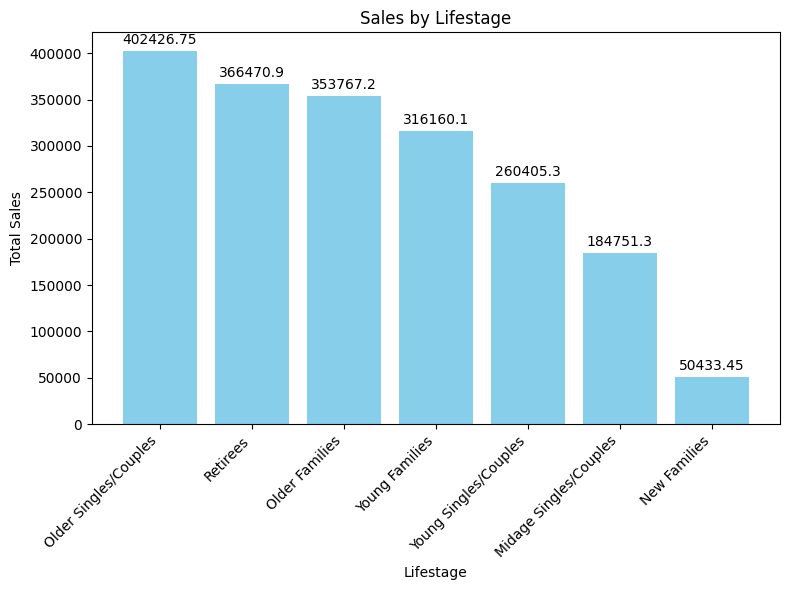

In [6]:
# Sales by lifestage.
sales_by_lifestage = purchase_transcation_data.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
sales_by_lifestage = sales_by_lifestage.sort_values(by='TOT_SALES', ascending=False)

# Create a bar chart with figures embedded inside the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(sales_by_lifestage['LIFESTAGE'], sales_by_lifestage['TOT_SALES'], color='skyblue')

# Add labels and figures inside the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Sales by Lifestage')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

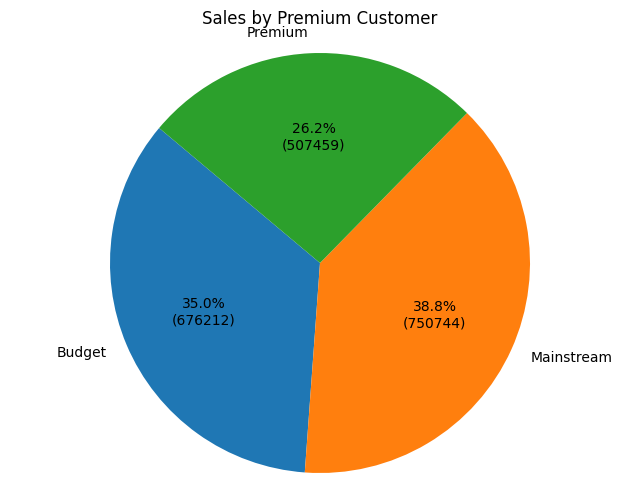

In [7]:
# Sales by premium customer.
sales_by_premium_customer = purchase_transcation_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sales_by_premium_customer['TOT_SALES'], labels=sales_by_premium_customer['PREMIUM_CUSTOMER'], autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sales_by_premium_customer['TOT_SALES']) / 100), startangle=140)
plt.title('Sales by Premium Customer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

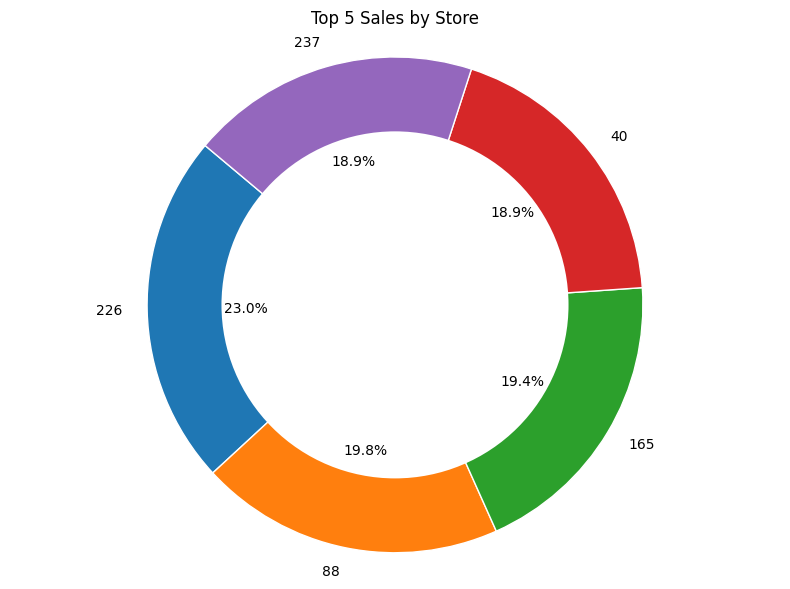

In [8]:
# % of sales by store.

# Group by 'STORE_NBR' and calculate the sum of sales
sales_by_store_nbr = purchase_transcation_data.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()

# Sort in descending order by 'TOT_SALES' and select the top 5
top_5_sales = sales_by_store_nbr.sort_values(by='TOT_SALES', ascending=False).head(5)

# Create a pie chart
plt.figure(figsize=(8, 6))

# Create the pie chart with a white circle in the center to make it look like a donut
plt.pie(top_5_sales['TOT_SALES'], labels=top_5_sales['STORE_NBR'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

# Draw a white circle in the center
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Top 5 Sales by Store')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

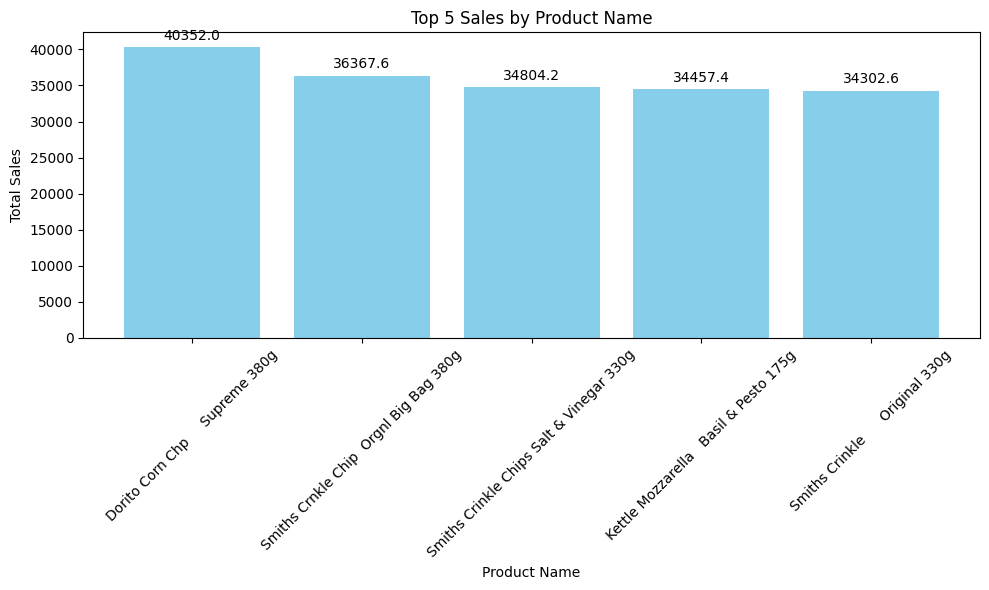

In [9]:
# Sales by Produdct Name.

# Group by 'PROD_NAME' and calculate the sum of sales
sales_by_prod_name = purchase_transcation_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Round the 'TOT_SALES' column to 2 decimal places
sales_by_prod_name['TOT_SALES'] = sales_by_prod_name['TOT_SALES'].round(2)

# Sort in descending order by 'TOT_SALES' and select the top 5
top_5_sales = sales_by_prod_name.sort_values(by='TOT_SALES', ascending=False).head(5)

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_sales['PROD_NAME'], top_5_sales['TOT_SALES'], color='skyblue')

# Add sales figures as text labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords='offset points', ha='center', va='bottom')

plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 5 Sales by Product Name')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

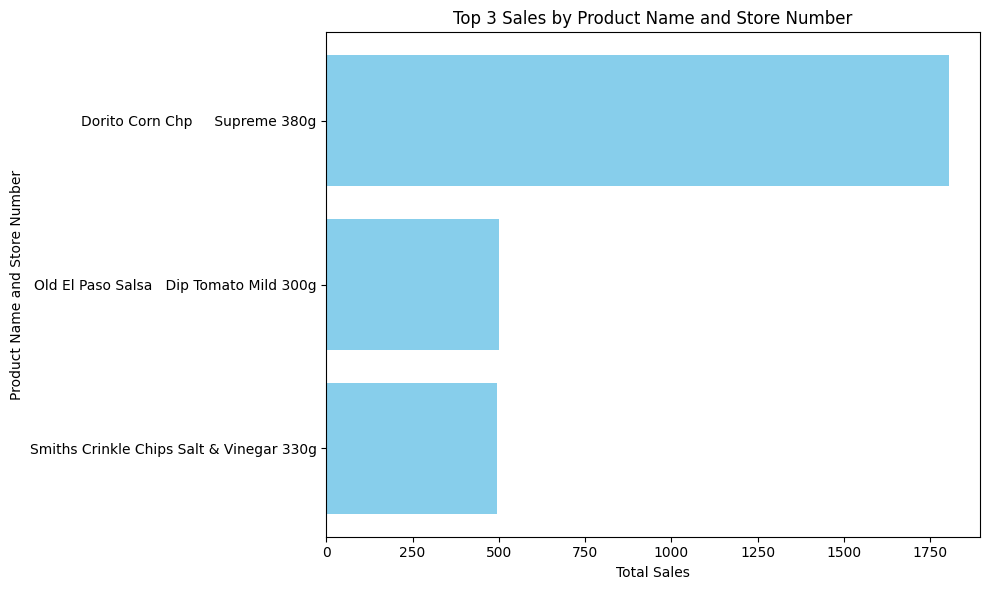

                                      PROD_NAME  STORE_NBR  TOT_SALES
2300           Dorito Corn Chp     Supreme 380g        226    1803.75
10875  Old El Paso Salsa   Dip Tomato Mild 300g         40     499.80
16192  Smiths Crinkle Chips Salt & Vinegar 330g        226     495.90


In [10]:
# Top 3 sale by product name and store number.

# Group by 'STORE_NBR', and 'PROD_NAME', and calculate the sum of sales
sales_by_category = purchase_transcation_data.groupby([ 'PROD_NAME', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()
sales_by_category = sales_by_category.sort_values(by='TOT_SALES', ascending=False)

# Get the top 5 sales records
top_3_sales = sales_by_category.head(3)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_3_sales['PROD_NAME'], top_3_sales['TOT_SALES'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Name and Store Number')
plt.title('Top 3 Sales by Product Name and Store Number')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest sales at the top
plt.tight_layout()

# Show the chart
plt.show()

print(top_3_sales)

In [11]:
# Product Quantiny by store and product.

# Group by 'STORE_NBR', 'PROD_NAME', and 'PROD_QTY', and calculate the sum of sales
quantity_by_category = purchase_transcation_data.groupby(['STORE_NBR', 'PROD_NAME'])['PROD_QTY'].sum().reset_index()

# Sort in descending order by 'TOT_SALES'
quantity_by_category = quantity_by_category.sort_values(by='PROD_QTY', ascending=False)
category_top_10 = quantity_by_category.head(10)
# Display the result
print(category_top_10)


       STORE_NBR                                 PROD_NAME  PROD_QTY
19141        226          Dorito Corn Chp     Supreme 380g       479
19193        226    Tyrrells Crisps     Ched & Chives 165g        99
7342          88    Infzns Crn Crnchers Tangy Gcamole 110g        99
3331          40  Old El Paso Salsa   Dip Tomato Mild 300g        98
19185        226          Thins Chips Seasonedchicken 175g        97
7327          88    Cobs Popd Sour Crm  &Chives Chips 110g        95
19190        226                  Twisties Cheese     270g        94
5008          58      Kettle Tortilla ChpsFeta&Garlic 150g        93
17293        203          Kettle Honey Soy    Chicken 175g        91
19189        226             Tostitos Splash Of  Lime 175g        90
